HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

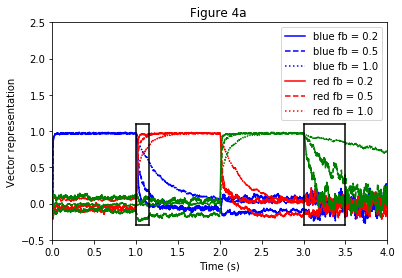

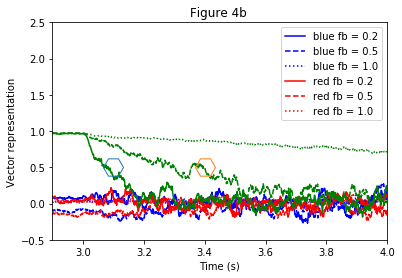

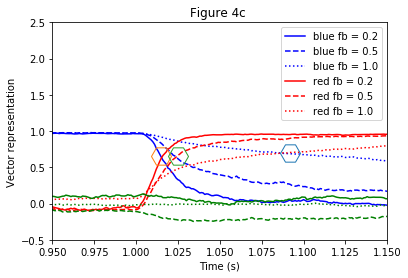

In [1]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
%matplotlib inline
# with and without seed
import numpy as np
import random
import pickle

d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1

with spa.Network(seed = 1) as model:
        
        fb2 = 0.2
        fb5 = 0.5
        fb10 = 1.0
        feedback = [fb2, fb5, fb10]
        numbers = [0,1,2]
        new_red = [0,1,2]
        new_blue = [0,1,2]
        new_green = [0,1,2]
        new_sim_blue_probe = [0,1,2]
        new_sim_red_probe = [0,1,2]
        new_sim_green_probe = [0,1,2]
        new_numbers = np.array([[0,1,2],[3,4,5]])
        feedback = [numbers[0] + 0.2, numbers[1] -0.5, numbers[2] -1.05]
        #numbers_array = np.zeros((1500,3,3))
 
        
        for x in numbers:
            
            noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
            timer = time_interval + wait
            vocab = spa.Vocabulary(d)
            vocab.populate('BLUE; RED; GREEN')
            GREEN = vocab.parse('GREEN')
            RED = vocab.parse('RED')
            BLUE = vocab.parse('BLUE')
            
        #make it feedback[0] as loop is out
            Color = spa.State(vocab, feedback = feedback[x], represent_cc_identity = False)
        
            nengo.Connection(noise,Color.input, synapse = 0.01)
        
        
            def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        
            def red_input(t):
                return RED
        
            def green_input(t):
                return GREEN
        
            def blue_input(t):
                return BLUE
        
            input_transcode = spa.Transcode(input, output_vocab = vocab)
            input_transcode >> Color
            Red = spa.State(vocab, feedback = feedback[x])
            red_transcode = spa.Transcode(function = red_input, output_vocab = vocab)
            red_transcode >> Red
            probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
            probe_Red = nengo.Probe(Red.output, synapse = 0.01) 
        
            Green = spa.State(vocab, feedback = feedback[x])
            green_transcode = spa.Transcode(function = green_input, output_vocab = vocab)
            green_transcode >> Green
            probe_Green = nengo.Probe(Green.output, synapse = 0.01)
        
            Blue = spa.State(vocab, feedback = feedback[x])
            blue_transcode = spa.Transcode(function = blue_input, output_vocab = vocab)
            blue_transcode >> Blue
            probe_Blue = nengo.Probe(Blue.output, synapse = 0.01)
            new_sim_red = spa.Compare(vocab, neurons_per_dimension = 50)
            new_sim_green = spa.Compare(vocab, neurons_per_dimension = 50)
            new_sim_blue = spa.Compare(vocab, neurons_per_dimension = 50)
            
            nengo.Connection(Red.output, new_sim_red.input_a, synapse = 0.001)
            nengo.Connection(Color.output, new_sim_red.input_b, synapse = 0.001)
        
            nengo.Connection(Green.output, new_sim_green.input_a, synapse = 0.001)
            nengo.Connection(Color.output, new_sim_green.input_b, synapse = 0.001)
        
            nengo.Connection(Blue.output, new_sim_blue.input_a, synapse = 0.001)
            nengo.Connection(Color.output, new_sim_blue.input_b, synapse = 0.001)
            
            
            
            
            new_sim_red_probe[x] = nengo.Probe(new_sim_red.output, synapse = 0.01)   
            new_sim_green_probe[x] = nengo.Probe(new_sim_green.output, synapse = 0.01)   
            new_sim_blue_probe[x] = nengo.Probe(new_sim_blue.output, synapse = 0.01)   
        
            def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000



        
            with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
               
                sim.run(timer * 4)  
        
                numbers[x]  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                
                numbers_array_0 = np.asarray(numbers[0])   
                numbers_array_1 = np.asarray(numbers[1])
                numbers_array_2 = np.asarray(numbers[2]) 
        
        #print(numbers_array[0])
        pickle.dump(numbers_array_0, open("Numbers_0", "wb"))
        pickle.dump(numbers_array_1, open("Numbers_1", "wb"))
        pickle.dump(numbers_array_2, open("Numbers_2", "wb"))
        '''
        plt.figure()
        xmin, xmax = 0, 4
        ymin, ymax = -0.5, 2.5
        plt.plot(sim.trange(),numbers_array_0[:,0],'b-', label = 'blue fb = 0.2' )
        plt.plot(sim.trange(),numbers_array_1[:,0],'b--',  label = 'blue fb = 0.5' )
        plt.plot(sim.trange(),numbers_array_2[:,0],'b:', label = 'blue fb = 1.0'  )
        plt.plot(sim.trange(),numbers_array_0[:,1],'r-', label =  'red fb = 0.2'  )
        plt.plot(sim.trange(),numbers_array_1[:,1],'r--', label =  'red fb = 0.5'   )
        plt.plot(sim.trange(),numbers_array_2[:,1],'r:', label =  'red fb = 1.0'   )
        plt.plot(sim.trange(),numbers_array_0[:,2],'g-' )
        plt.plot(sim.trange(),numbers_array_1[:,2],'g--' )
        plt.plot(sim.trange(),numbers_array_2[:,2],'g:' )
        L_bottom = [3.0, -0.3]
        R_bottom = [3.5, -0.3]
        L_top = [3.0,1.1]
        R_top = [3.5, 1.1]
        x_bottom = [L_bottom[0], R_bottom[0]]
        y_bottom = [L_bottom[1], R_bottom[1]]
        x_left = [L_bottom[0], L_top[0]]
        y_left = [L_bottom[1], L_top[1]]
        x_right = [R_bottom[0], R_top[0]]
        y_right = [R_bottom[1], R_top[1]]
        x_top = [L_top[0], R_top[0]]
        y_top = [L_top[1], R_top[1]]

        plt.plot(x_bottom, y_bottom, color = "black")
        plt.plot(x_left, y_left, color = "black")
        plt.plot(x_right, y_right, color = "black")
        plt.plot(x_top, y_top, color = "black")


        L_bottom2 = [1.0, -0.3]
        R_bottom2 = [1.15, -0.3]
        L_top2 = [1.0,1.1]
        R_top2 = [1.15, 1.1]
        x_bottom2 = [L_bottom2[0], R_bottom2[0]]
        y_bottom2 = [L_bottom2[1], R_bottom2[1]]
        x_left2 = [L_bottom2[0], L_top2[0]]
        y_left2 = [L_bottom2[1], L_top2[1]]
        x_right2 = [R_bottom2[0], R_top2[0]]
        y_right2 = [R_bottom2[1], R_top2[1]]
        x_top2 = [L_top2[0], R_top2[0]]
        y_top2 = [L_top2[1], R_top2[1]]

        plt.plot(x_bottom2, y_bottom2, color = "black")
        plt.plot(x_left2, y_left2, color = "black")
        plt.plot(x_right2, y_right2, color = "black")
        plt.plot(x_top2, y_top2, color = "black")

 
        
        plt.legend(['blue fb = 0.2' , 'blue fb = 0.5', 'blue fb = 1.0', 'red fb = 0.2', 'red fb = 0.5', 'red fb = 1.0'],  loc='best')
       
        
        plt.title("Figure 4a ")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        plt.savefig('Fig4a_Sept18'+ '.png')
        
        
        plt.figure()
        xmin, xmax = 2.9, 4
        ymin, ymax = -0.5, 2.5
        plt.plot(sim.trange(),numbers_array_0[:,0],'b-', label = 'blue fb = 0.2' )
        plt.plot(sim.trange(),numbers_array_1[:,0],'b--',  label = 'blue fb = 0.5' )
        plt.plot(sim.trange(),numbers_array_2[:,0],'b:', label = 'blue fb = 1.0'  )
        plt.plot(sim.trange(),numbers_array_0[:,1],'r-', label =  'red fb = 0.2'  )
        plt.plot(sim.trange(),numbers_array_1[:,1],'r--', label =  'red fb = 0.5'   )
        plt.plot(sim.trange(),numbers_array_2[:,1],'r:', label =  'red fb = 1.0'   )
        plt.plot(sim.trange(),numbers_array_0[:,2],'g-' )
        plt.plot(sim.trange(),numbers_array_1[:,2],'g--' )
        plt.plot(sim.trange(),numbers_array_2[:,2],'g:' )
       
        
        plt.legend(['blue fb = 0.2' , 'blue fb = 0.5', 'blue fb = 1.0', 'red fb = 0.2', 'red fb = 0.5', 'red fb = 1.0'],  loc='best')
       
        L_pt5 = [0.0, 0.5]
        R_pt5 = [4, 0.5]
        plt.plot(x_bottom2, y_bottom2, color = "black")
        
        bb=np.array([1])
        plt.plot(bb * 3.1,bb * 0.5,marker="H", fillstyle='none', markersize=20, linewidth=0)
        plt.plot(bb * 3.4,bb * 0.5,marker="H", fillstyle='none', markersize=20, linewidth=0)
        #plt.plot(bb * 1.025,bb * 0.65,marker="H", fillstyle='none', markersize=20, linewidth=0)
        
        
        
        plt.title("Figure 4b ")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        plt.savefig('Fig4b_Sept18'+ '.png')
        
        
        plt.figure()
        xmin, xmax = 0.95, 1.15
        ymin, ymax = -0.5, 2.5
        plt.plot(sim.trange(),numbers_array_0[:,0],'b-', label = 'blue fb = 0.2' )
        plt.plot(sim.trange(),numbers_array_1[:,0],'b--',  label = 'blue fb = 0.5' )
        plt.plot(sim.trange(),numbers_array_2[:,0],'b:', label = 'blue fb = 1.0'  )
        plt.plot(sim.trange(),numbers_array_0[:,1],'r-', label =  'red fb = 0.2'  )
        plt.plot(sim.trange(),numbers_array_1[:,1],'r--', label =  'red fb = 0.5'   )
        plt.plot(sim.trange(),numbers_array_2[:,1],'r:', label =  'red fb = 1.0'   )
        plt.plot(sim.trange(),numbers_array_0[:,2],'g-' )
        plt.plot(sim.trange(),numbers_array_1[:,2],'g--' )
        plt.plot(sim.trange(),numbers_array_2[:,2],'g:' )
       
        
        plt.legend(['blue fb = 0.2' , 'blue fb = 0.5', 'blue fb = 1.0', 'red fb = 0.2', 'red fb = 0.5', 'red fb = 1.0'],  loc='best')
       
        
        plt.title("Figure 4c ")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        
        bb=np.array([1])
        plt.plot(bb * 1.092,bb * 0.70,marker="H", fillstyle='none', markersize=20, linewidth=0)
        plt.plot(bb * 1.015,bb * 0.65,marker="H", fillstyle='none', markersize=20, linewidth=0)
        plt.plot(bb * 1.025,bb * 0.65,marker="H", fillstyle='none', markersize=20, linewidth=0)
        
        
        plt.savefig('Fig4c_Sept18'+ '.png')
        '''
